# Installation

Restart your runtime and rerun the *cell*, if Colab asks for it.

In [ ]:
# Install sklearn
!pip install scikit-learn==1.5.2

# Install TabPFN
!pip install tabpfn

# TabPFN Community installs optional functionalities around the TabPFN model
# These include post-hoc ensembles, interpretability tools, and more
!git clone https://github.com/PriorLabs/tabpfn-community
!pip install -e tabpfn-community[post_hoc_ensembles,interpretability,hpo]

# Install Baselines
!pip install catboost xgboost

# Install example datasets
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.7/160.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.7 MB

In [ ]:
!git clone https://github.com/PriorLabs/tabpfn-extensions
!pip install -e tabpfn-extensions[post_hoc_ensembles,interpretability,hpo]


Cloning into 'tabpfn-extensions'...
remote: Enumerating objects: 2089, done.
remote: Counting objects: 100% (281/281), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 2089 (delta 209), reused 184 (delta 184), pack-reused 1808 (from 2)
Receiving objects: 100% (2089/2089), 775.50 KiB | 10.07 MiB/s, done.
Resolving deltas: 100% (1275/1275), done.
Obtaining file:///content/tabpfn-extensions
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tabpfn-extensions (pyproject.toml) ... done
  Created wheel for tabpfn-extensions: filename=tabpfn_extensions-0.1.0-0.editable-py3-none-any.whl size=11662 sha256=dbefd199ab3ca77be6beecc0a9ae5cc45378e46bd4ae37dc82b82c479245b64c
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ex9x5su/wheels/8f/b7/2c/ec18b502697068b39e1503426a50b729bdac046bed4810759d
Succ

**Now Restart the Runtime**

# Necessary Imports for the Notebook

The examples in this notebook require the following imports.
Make sure to run this cell before any other cell.




### In order to get the fastest predictions you need to enable GPUs for the notebook:
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
  Using cached catboost-1.2.8-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB

In [ ]:
import os

# Setup Imports
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    mean_poisson_deviance,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import torch

from tabpfn import TabPFNClassifier, TabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')



In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 

In [ ]:
# to connect to google drive
%pip install sdv

from google.colab import drive
from google.colab import files

import time
import gc

drive.mount("/content/drive")
%cd /content/drive/My Drive/French Cars/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.6 MB/s eta 0:00:00
Mounted at /content/drive
/content/drive/My Drive/French Cars


# Predicting with TabPFN

For our first example, we will use the client to predict on the French Cars Severity Data

## Regression

We now compare the regression performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/).

We measure regression performance using [Root Mean Squared Error](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_error.html).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load datasets
freq = pd.read_csv("freMTPL2freq.csv")
sev = pd.read_csv("freMTPL2sev.csv")

# Step 1: Aggregate severity per policy
sev_agg = sev.groupby("IDpol", as_index=False)["ClaimAmount"].sum()

# Step 2: Merge with frequency dataset
df = pd.merge(freq, sev_agg, on="IDpol", how="inner")

# Step 3: Filter for ClaimAmount > 0 and cap large claims
df = df[df["ClaimAmount"] > 0]
df = df[df["ClaimAmount"] <= 50000]

# Step 4: Drop IDpol (if it exists), and any NAs
df.drop(columns=['IDpol'], errors='ignore', inplace=True)
df.dropna(inplace=True)

# Step 5: Define features before encoding
# Define target variable
target = 'ClaimAmount'
# Define features by dropping the target variable from the DataFrame
features = df.drop(columns=[target]) # Assuming 'ClaimAmount' is the target

# Step 6: Encode categoricals
for col in features.select_dtypes(include=['object', 'category']).columns:
    features[col] = pd.factorize(features[col])[0]

# Step 7: Train/test/validation split
X_train, X_temp, y_train, y_temp = train_test_split(features, df[target], train_size=10000, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Changed test_size to 0.5
                                                                                                   # This will split the remaining data in half
                                                                                                   # between test and validation sets.
print("Severity modeling dataset is ready.")

Severity modeling dataset is ready.


In [ ]:
!pip install lightgbm
import lightgbm as lgb

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 17428, number of used features: 11
[LightGBM] [Info] Start training from score 1689.640029


/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:101: UserWarning: Downloading model to /root/.cache/tabpfn/tabpfn-v2-regressor.ckpt.
  model, bardist, config_ = load_model_criterion_config(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

<ipython-input-6-984fdb9b5524>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_plot.groupby("RatioBin").agg({
<ipython-input-6-984fdb9b5524>:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped.index, rotation=45)


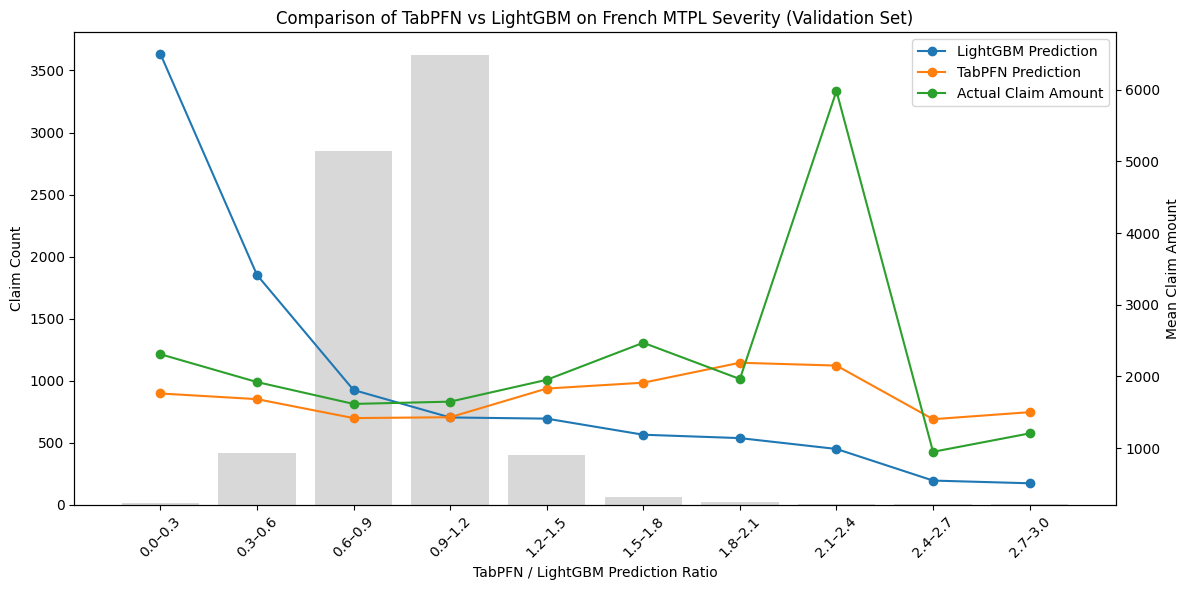

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabpfn import TabPFNRegressor

# Step 1: Train models
lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))

tabpfn_model = TabPFNRegressor(random_state=42)
tabpfn_model.fit(X_train, y_train)

# Step 2: Predict on validation set
lgbm_preds = lgbm_model.predict(X_val)
tabpfn_preds = tabpfn_model.predict(X_val)

# Step 3: Compute ratio and bin it
ratios = tabpfn_preds / np.maximum(lgbm_preds, 1e-6)  # Avoid div by zero

# Use wider bins for a cleaner X-axis
bins = np.arange(0, 3.1, 0.3)  # Bins from 0.0 to 3.0 in steps of 0.3
labels = [f"{round(b,1)}–{round(b+0.3,1)}" for b in bins[:-1]]

df_plot = pd.DataFrame({
    'RatioBin': pd.cut(ratios, bins=bins, labels=labels, include_lowest=True),
    'TabPFN': tabpfn_preds,
    'LightGBM': lgbm_preds,
    'Actual': y_val.reset_index(drop=True)
})

# Step 4: Aggregate
grouped = df_plot.groupby("RatioBin").agg({
    'TabPFN': 'mean',
    'LightGBM': 'mean',
    'Actual': 'mean'
})
grouped['Count'] = df_plot['RatioBin'].value_counts().sort_index()

# Step 5: Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (counts)
ax1.bar(grouped.index, grouped['Count'], alpha=0.3, label='Claim Count', color='gray')
ax1.set_ylabel("Claim Count")
ax1.set_xlabel("TabPFN / LightGBM Prediction Ratio")
ax1.set_xticklabels(grouped.index, rotation=45)

# Line plots (prediction comparisons)
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['LightGBM'], label='LightGBM Prediction', marker='o')
ax2.plot(grouped.index, grouped['TabPFN'], label='TabPFN Prediction', marker='o')
ax2.plot(grouped.index, grouped['Actual'], label='Actual Claim Amount', marker='o')
ax2.set_ylabel("Mean Claim Amount")
ax2.legend(loc="upper right")

plt.title("Comparison of TabPFN vs LightGBM on French MTPL Severity (Validation Set)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_gamma_deviance

# Clip predictions to avoid division by zero
lgbm_preds_clipped = np.maximum(lgbm_preds, 1e-6)
tabpfn_preds_clipped = np.maximum(tabpfn_preds, 1e-6)

# Calculate gamma deviance
lgbm_gamma_dev = mean_gamma_deviance(y_val, lgbm_preds_clipped)
tabpfn_gamma_dev = mean_gamma_deviance(y_val, tabpfn_preds_clipped)

# Print results nicely
print(f"LightGBM Mean Gamma Deviance: {lgbm_gamma_dev:.2f}")
print(f"TabPFN   Mean Gamma Deviance: {tabpfn_gamma_dev:.2f}")

LightGBM Mean Gamma Deviance: 1.10
TabPFN   Mean Gamma Deviance: 1.05


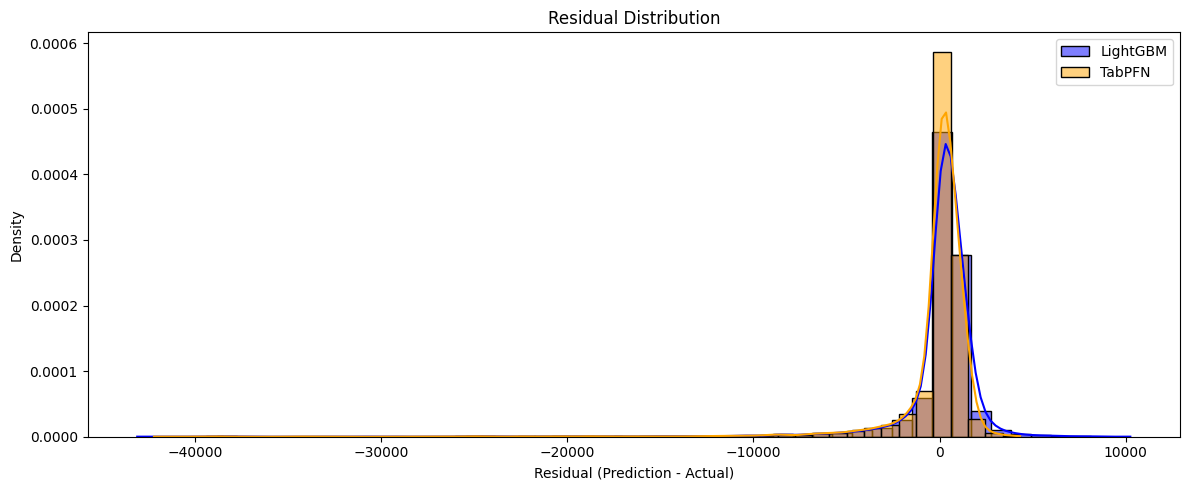

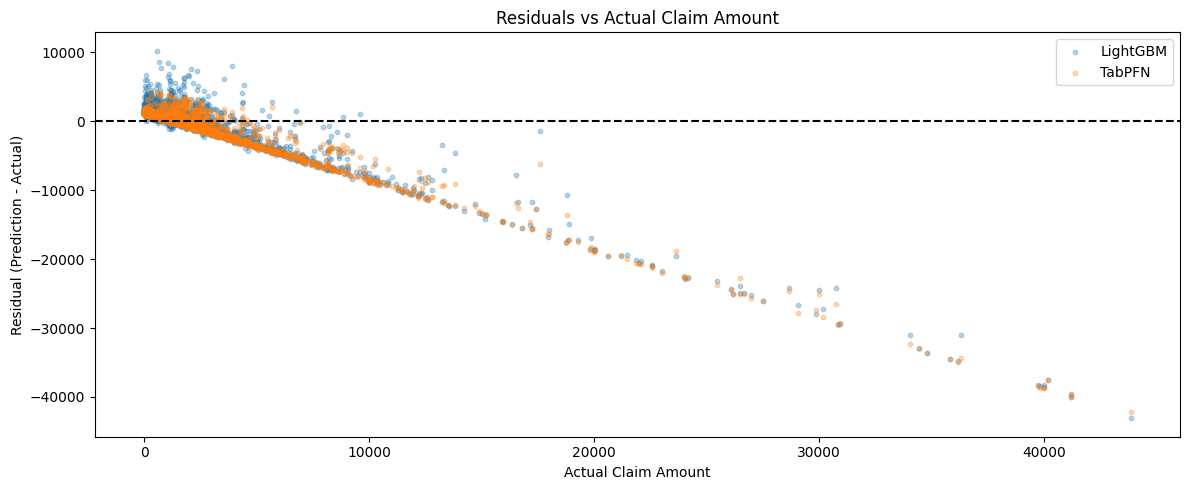

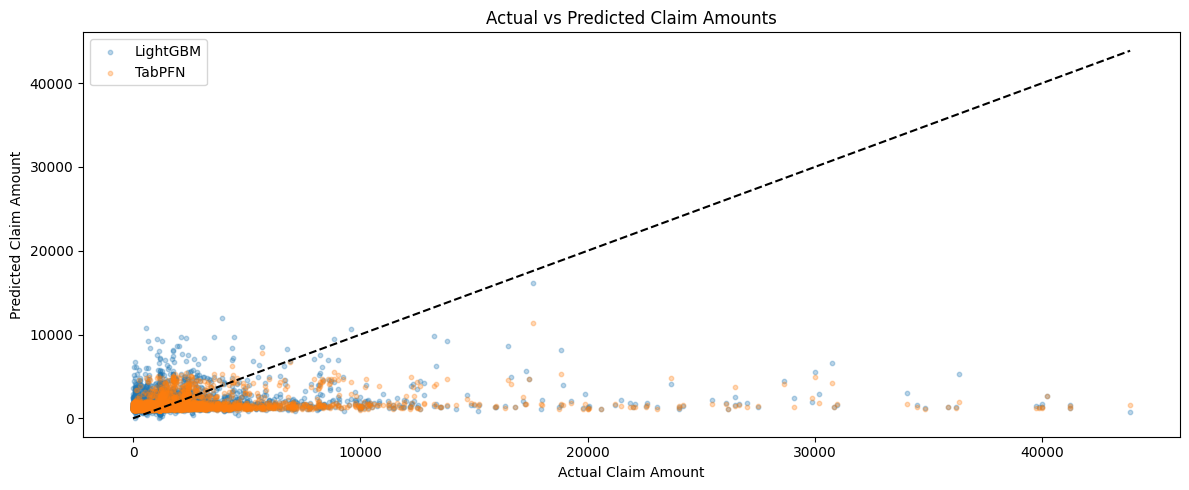

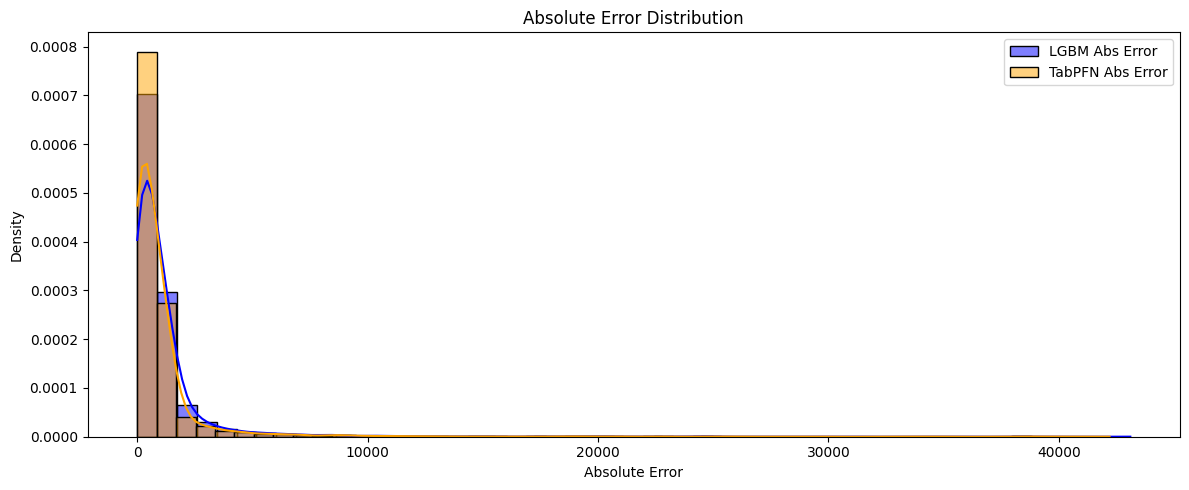

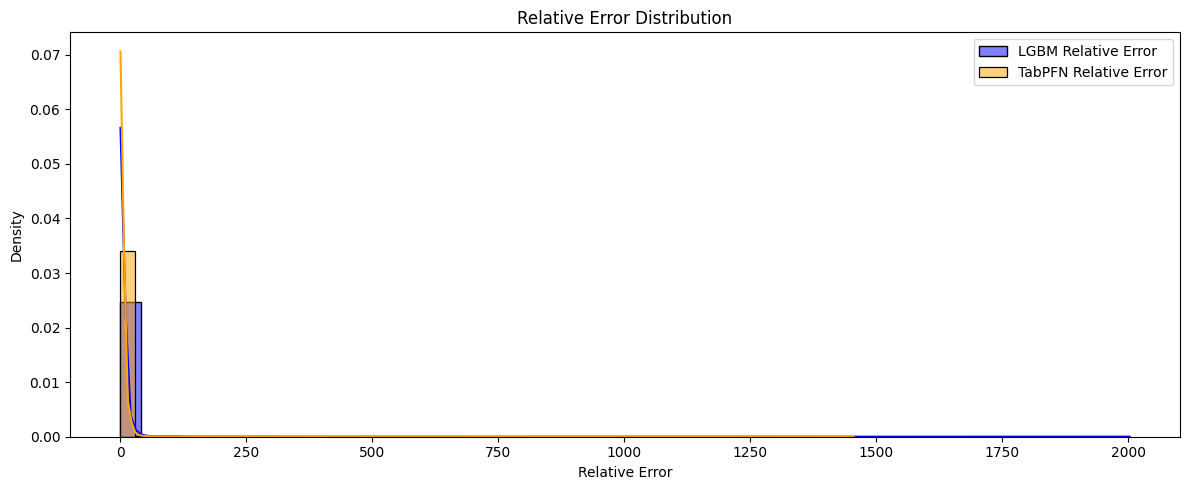

In [ ]:
# 1. Residual histograms
residuals_lgbm = lgbm_preds - y_val
residuals_tabpfn = tabpfn_preds - y_val

plt.figure(figsize=(12, 5))
sns.histplot(residuals_lgbm, kde=True, color="blue", label="LightGBM", stat="density", bins=50)
sns.histplot(residuals_tabpfn, kde=True, color="orange", label="TabPFN", stat="density", bins=50)
plt.title("Residual Distribution")
plt.xlabel("Residual (Prediction - Actual)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residuals vs Actual
plt.figure(figsize=(12, 5))
plt.scatter(y_val, residuals_lgbm, alpha=0.3, label="LightGBM", s=10)
plt.scatter(y_val, residuals_tabpfn, alpha=0.3, label="TabPFN", s=10)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Actual Claim Amount")
plt.xlabel("Actual Claim Amount")
plt.ylabel("Residual (Prediction - Actual)")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.scatter(y_val, lgbm_preds, alpha=0.3, label="LightGBM", s=10)
plt.scatter(y_val, tabpfn_preds, alpha=0.3, label="TabPFN", s=10)
max_val = max(y_val.max(), lgbm_preds.max(), tabpfn_preds.max())
plt.plot([0, max_val], [0, max_val], 'k--')  # 45-degree line
plt.title("Actual vs Predicted Claim Amounts")
plt.xlabel("Actual Claim Amount")
plt.ylabel("Predicted Claim Amount")
plt.legend()
plt.tight_layout()
plt.show()

# 4. Absolute and Relative Error Distributions
abs_error_lgbm = np.abs(residuals_lgbm)
abs_error_tabpfn = np.abs(residuals_tabpfn)
rel_error_lgbm = abs_error_lgbm / np.maximum(y_val, 1e-6)
rel_error_tabpfn = abs_error_tabpfn / np.maximum(y_val, 1e-6)

# Absolute error
plt.figure(figsize=(12, 5))
sns.histplot(abs_error_lgbm, color="blue", label="LGBM Abs Error", bins=50, stat="density", kde=True)
sns.histplot(abs_error_tabpfn, color="orange", label="TabPFN Abs Error", bins=50, stat="density", kde=True)
plt.title("Absolute Error Distribution")
plt.xlabel("Absolute Error")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Relative error
plt.figure(figsize=(12, 5))
sns.histplot(rel_error_lgbm, color="blue", label="LGBM Relative Error", bins=50, stat="density", kde=True)
sns.histplot(rel_error_tabpfn, color="orange", label="TabPFN Relative Error", bins=50, stat="density", kde=True)
plt.title("Relative Error Distribution")
plt.xlabel("Relative Error")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

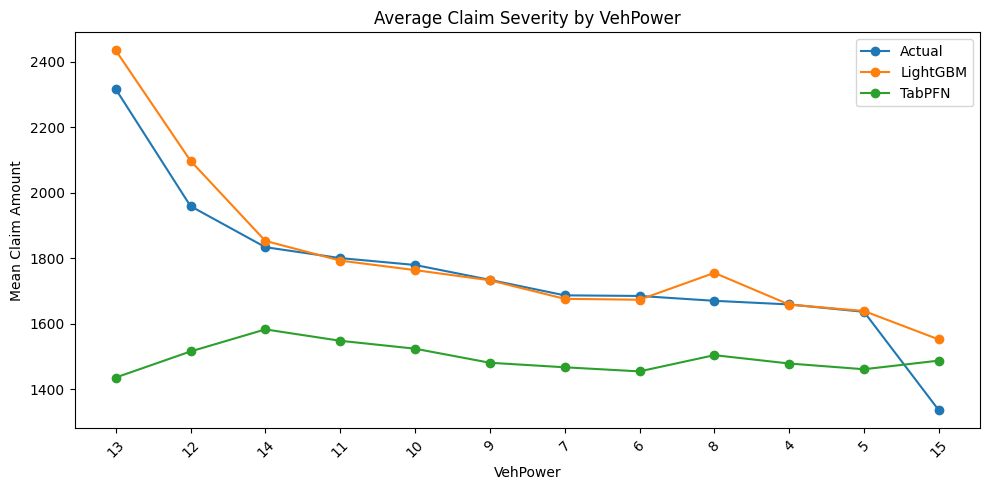

<ipython-input-9-a6c93b6839a0>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(var).agg({


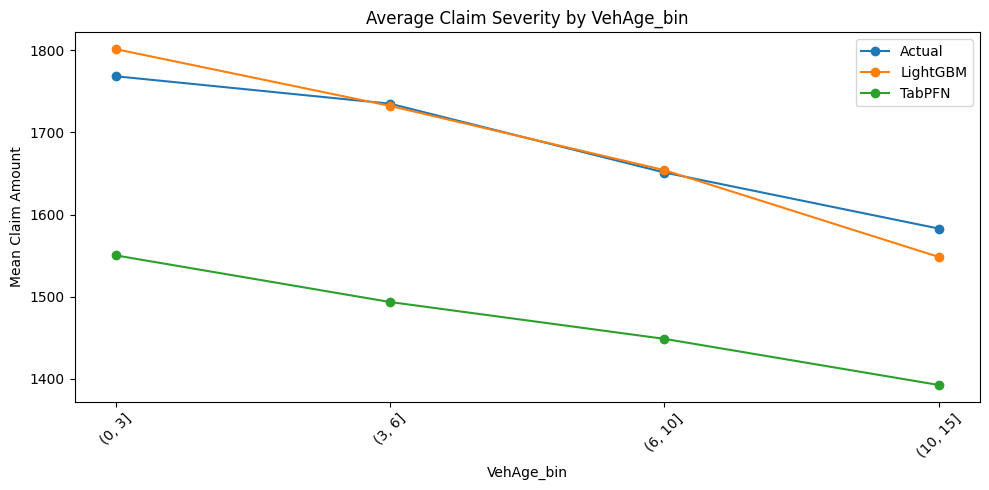

<ipython-input-9-a6c93b6839a0>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(var).agg({


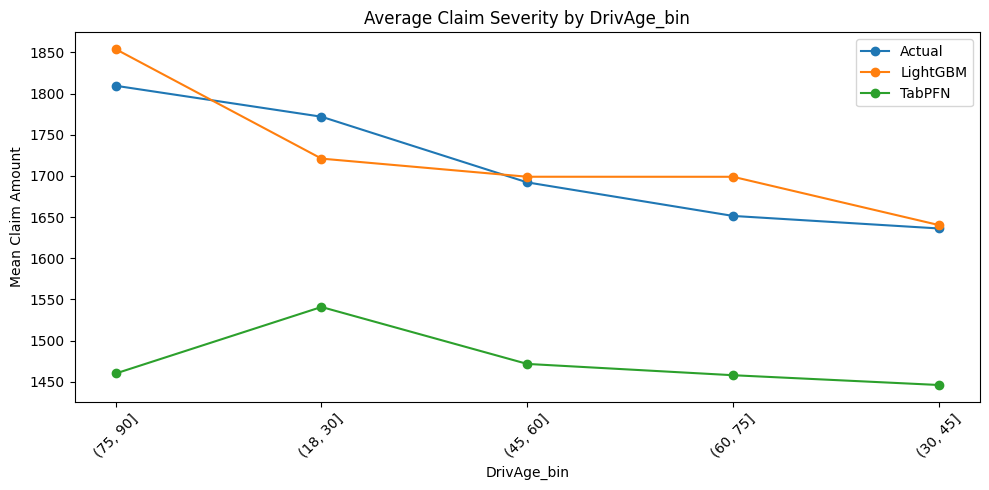

<ipython-input-9-a6c93b6839a0>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(var).agg({


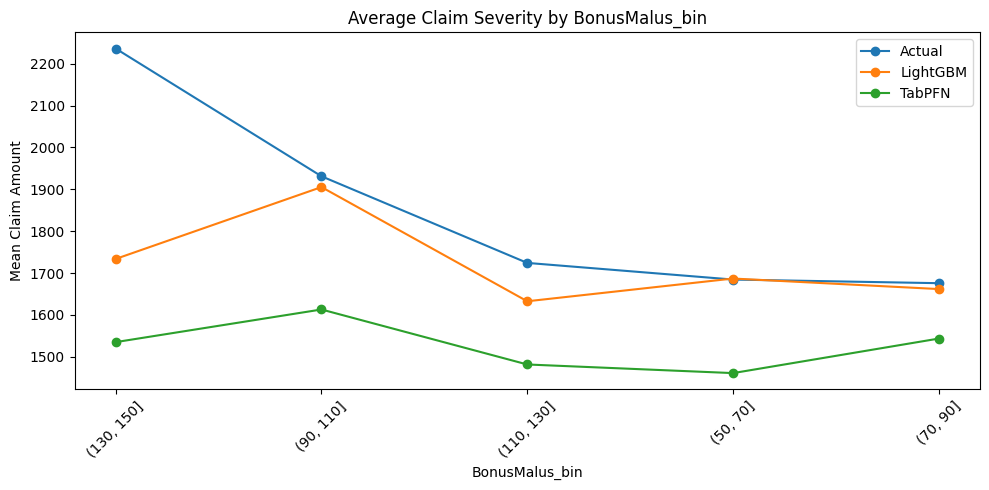

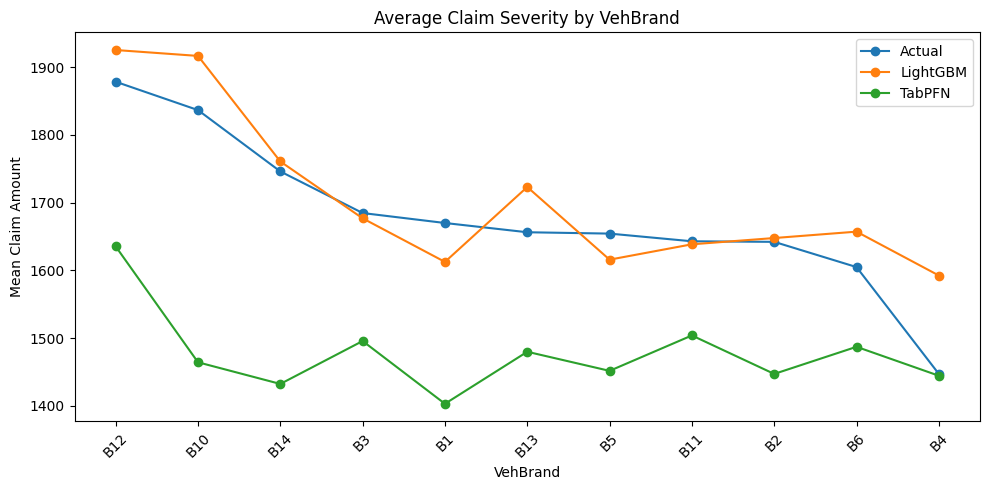

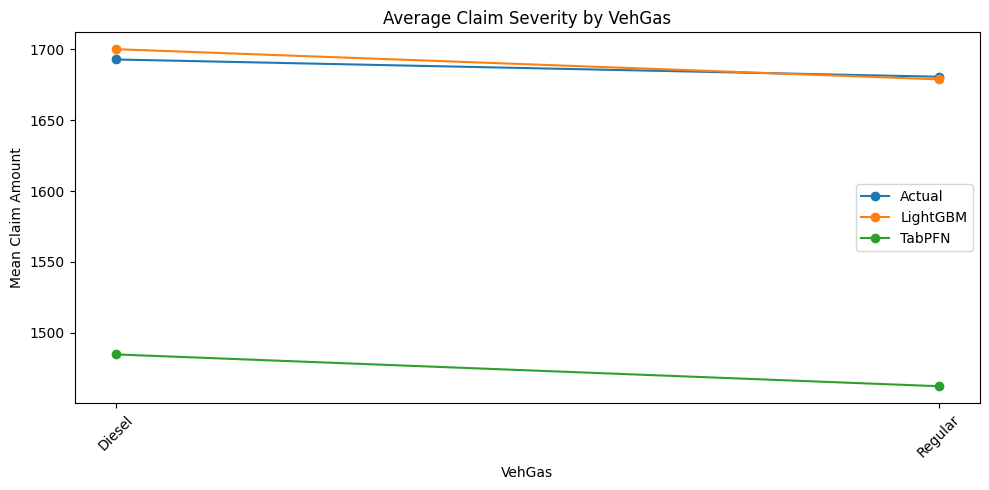

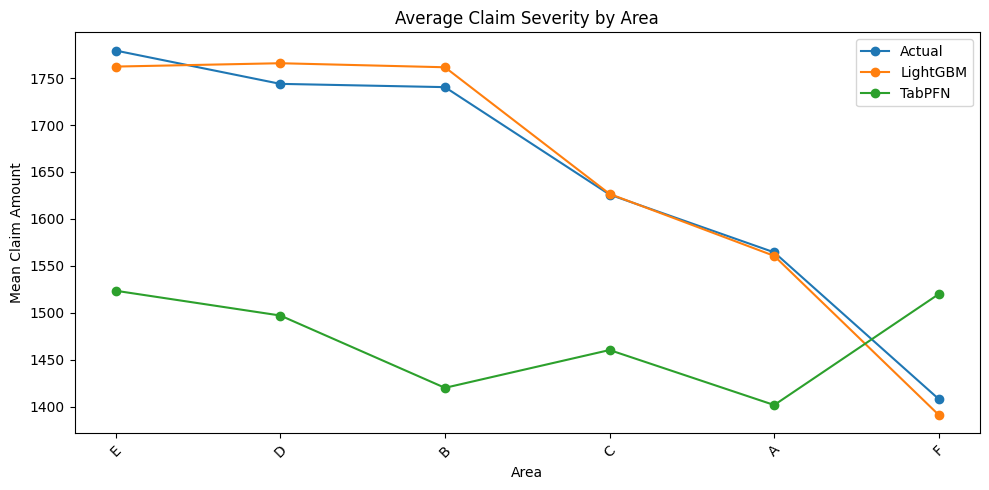

<ipython-input-9-a6c93b6839a0>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(var).agg({


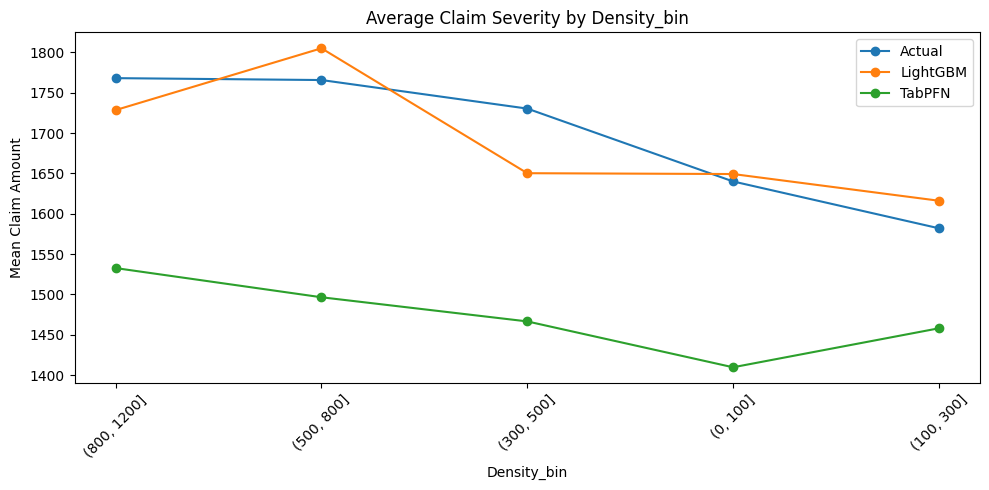

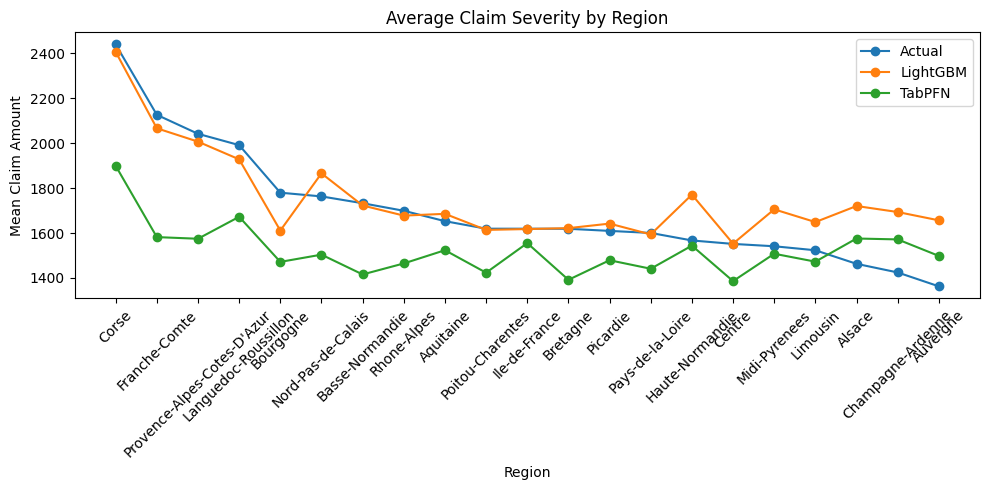

In [ ]:
# Bin continuous vars
bin_vars = {
    "VehAge": [0, 3, 6, 10, 15],
    "DrivAge": [18, 30, 45, 60, 75, 90],
    "BonusMalus": [50, 70, 90, 110, 130, 150],
    "Density": [0, 100, 300, 500, 800, 1200]
}
for var, bins in bin_vars.items():
    df[f"{var}_bin"] = pd.cut(df[var], bins=bins)

# Add predictions to the main DataFrame (df) before grouping
df['Actual'] = df[target]  # Assuming 'target' was your target variable from earlier

# Convert categorical features to numerical using Label Encoding before prediction
# Create a copy of features to avoid modifying the original DataFrame
features_encoded = features.copy()
for col in features_encoded.select_dtypes(include=['object', 'category']).columns:
    features_encoded[col] = pd.factorize(features_encoded[col])[0] # This is crucial for LightGBM

df['LightGBM'] = lgbm_model.predict(features_encoded) # Use features_encoded for prediction

# *** Changed Line: Use features_encoded for TabPFN prediction as well ***
df['TabPFN'] = tabpfn_model.predict(features_encoded)

plot_vars = [
    "VehPower", "VehAge_bin", "DrivAge_bin", "BonusMalus_bin",
    "VehBrand", "VehGas", "Area", "Density_bin", "Region"
]

for var in plot_vars:
    plt.figure(figsize=(10, 5))
    # Now 'df' has the required columns, so groupby will work
    grouped = df.groupby(var).agg({
        "Actual": "mean",
        "LightGBM": "mean",
        "TabPFN": "mean"
    }).reset_index()
    grouped = grouped.sort_values("Actual", ascending=False)

    x_labels = grouped[var].astype(str)
    x = np.arange(len(x_labels))

    plt.plot(x, grouped["Actual"], label="Actual", marker='o')
    plt.plot(x, grouped["LightGBM"], label="LightGBM", marker='o')
    plt.plot(x, grouped["TabPFN"], label="TabPFN", marker='o')

    plt.xticks(x, x_labels, rotation=45)
    plt.title(f"Average Claim Severity by {var}")
    plt.ylabel("Mean Claim Amount")
    plt.xlabel(var)
    plt.legend()
    plt.tight_layout()
    plt.show()

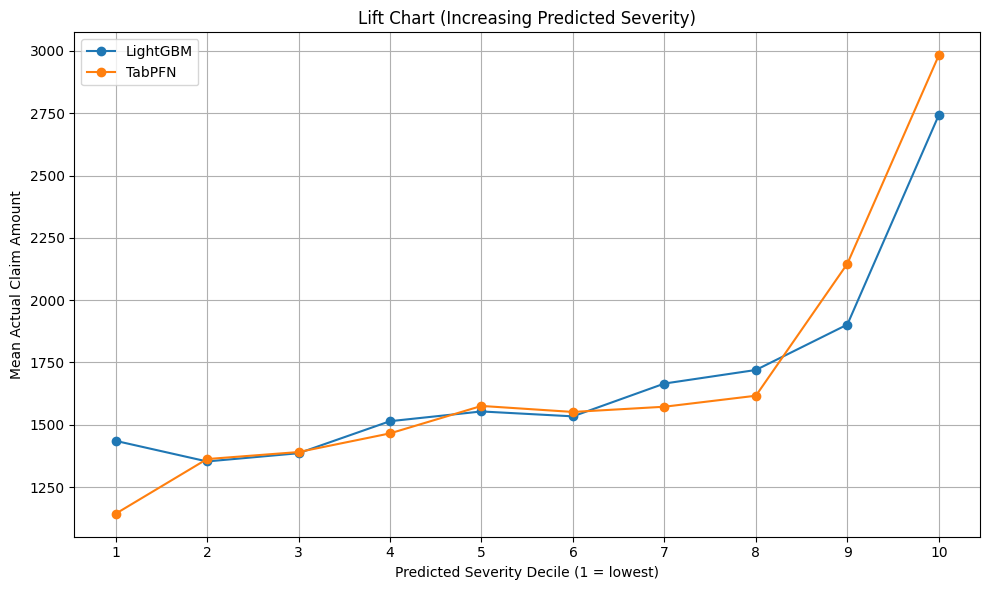

In [ ]:
def lift_chart_increasing(y_true, preds_dict):
    plt.figure(figsize=(10, 6))
    for model_name, y_pred in preds_dict.items():
        df = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})
        df['Decile'] = pd.qcut(df['Predicted'], 10, labels=False)  # Decile 0 = lowest predicted
        grouped = df.groupby('Decile').agg({'Actual': 'mean'})
        plt.plot(range(1, 11), grouped['Actual'], marker='o', label=model_name)

    plt.title("Lift Chart (Increasing Predicted Severity)")
    plt.xlabel("Predicted Severity Decile (1 = lowest)")
    plt.ylabel("Mean Actual Claim Amount")
    plt.xticks(ticks=range(1, 11))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
lift_chart_increasing(y_val, {
    "LightGBM": lgbm_preds,
    "TabPFN": tabpfn_preds
})


